plot some example ROIs that are stable place cells throughout first 6 days of imaging
plot cell footprint on day1 and day6 with cell highlighted and red green overlay as red and purple, union is white

In [10]:
import os
import math

import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
from matplotlib import gridspec
import dill

import suite2p as s2p

import TwoPUtils as tpu
import STX3KO_analyses as stx
from STX3KO_analyses import utilities as u

ko_mice = stx.ymaze_sess_deets.ko_mice
ctrl_mice = stx.ymaze_sess_deets.ctrl_mice


%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
figdir = "/mnt/BigDisk/YMazeResults/neural/example_place_cells"
os.makedirs(figdir, exist_ok=True)

In [5]:
sess = u.single_mouse_concat_sessions(ko_mice[-1], date_inds = np.arange(6),load_stats=True, load_ops = True)

18_10_2021 YMaze_LNovel
19_10_2021 YMaze_LNovel
20_10_2021 YMaze_LNovel
21_10_2021 YMaze_LNovel
23_10_2021 YMaze_LNovel
23_10_2021 YMaze_LNovel


In [18]:
len(sess.s2p_stats)

2

In [19]:
pc_mask = sess.fam_place_cell_mask() + sess.nov_place_cell_mask() >0
pc_inds = np.argwhere(pc_mask)[:,0]

KeyError: 'meanImg_chan2'

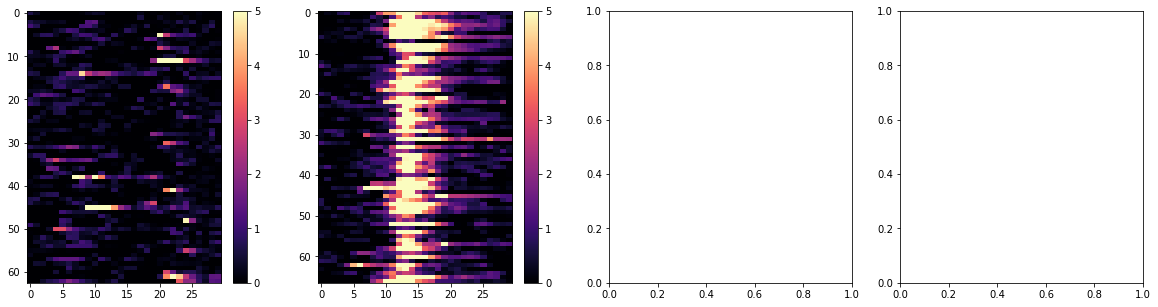

In [22]:
save =False
for cell in pc_inds:
    fig, ax = plt.subplots(1,4, figsize = [20, 5])
    
    fam_trialmat, nov_trialmat = sess.trial_matrices['spks'][sess.trial_info['LR']==-1*sess.novel_arm,:,:][:,:,cell], sess.trial_matrices['spks'][sess.trial_info['LR']==sess.novel_arm,:,:][:,:,cell]
    mean = np.nanmean(sess.trial_matrices['spks'][:,:,cell].ravel())
    fam_trialmat[np.isnan(fam_trialmat)]=1E-3
    nov_trialmat[np.isnan(nov_trialmat)]=1E-3
    h = ax[0].imshow(fam_trialmat/mean, cmap = 'magma', aspect='auto', vmin = 0, vmax=5)
    plt.colorbar(h,ax=ax[0])
    h = ax[1].imshow(nov_trialmat/mean, cmap = 'magma', aspect='auto', vmin = 0, vmax=5)
    plt.colorbar(h,ax=ax[1])
    
    day0_com = (sess.s2p_stats[0][cell]['xpix'].mean(), sess.s2p_stats[0][cell]['ypix'].mean())
    day5_com = (sess.s2p_stats[len(sess.s2p_stats)-1][cell]['xpix'].mean(), sess.s2p_stats[len(sess.s2p_stats)-1][cell]['ypix'].mean())
    
    day0img = np.zeros([100,100,3])

    x_edges = (np.int(day0_com[1]-50), np.int(day0_com[1]+50))
    y_edges = ( np.int(day0_com[0]-50), np.int(day0_com[0]+50))
    g_img = sess.s2p_ops[0]['meanImg'][x_edges[0]:x_edges[1], y_edges[0]:y_edges[1]]
    r_img = sess.s2p_ops[0]['meanImg_chan2'][x_edges[0]:x_edges[1], y_edges[0]:y_edges[1]]
    day0img[:,:,1] = g_img/np.amax(g_img)
    day0img[:,:,0] = r_img/np.amax(r_img)
    day0img[:,:,2] = r_img/np.amax(r_img)
    ax[2].imshow(day0img,cmap='Greys_r')
    
    circle = plt.Circle((50,50), 7, fill=False, color='blue',linewidth=3)
    ax[2].add_patch(circle)
    
    day5img = np.zeros([100,100,3])

    x_edges = (np.int(day5_com[1]-50), np.int(day5_com[1]+50))
    y_edges = ( np.int(day5_com[0]-50), np.int(day5_com[0]+50))
    g_img = sess.s2p_ops[len(sess.s2p_stats)-1]['meanImg'][x_edges[0]:x_edges[1], y_edges[0]:y_edges[1]]
    r_img = sess.s2p_ops[len(sess.s2p_stats)-1]['meanImg_chan2'][x_edges[0]:x_edges[1], y_edges[0]:y_edges[1]]
    day5img[:,:,1] = g_img/np.amax(g_img)
    day5img[:,:,0] = r_img/np.amax(r_img)
    day5img[:,:,2] = r_img/np.amax(r_img)
    ax[3].imshow(day5img,cmap='Greys_r')
    
    
    circle = plt.Circle((50,50), 7, fill=False, color='blue',linewidth=3)
    ax[3].add_patch(circle)
    
    fig.suptitle("cell %d" % cell)
    
    if save:
        mouse_dir = os.path.join(figdir, sess.mouse)
        os.makedirs(mouse_dir,exist_ok = True)
        fig.savefig(os.path.join(mouse_dir,"cell%d.pdf" % cell),format = 'pdf')
    

#     ax[2].scatter(*day0_com)
#    